# Importing Libraries



in this part we will install all the necessary libraries on command prompt and then import the necessary functions from those libraries. 

In [34]:
# importing all the necessary libraries



import pandas as pd







from numpy import mean



import numpy as np



import time







# step 1: preprocessing



from sklearn.impute import SimpleImputer # import some strategic imputer to fill in any missing values using mean



from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer # scale all the values to one range to avoid any biasness (this bias is seen in mostly naive bayes and knn etc)







from sklearn.impute import KNNImputer # import some strategic imputer to fill missing values using KNN (finds the nearest neighbour and fills it with that value)







from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_classif, VarianceThreshold, f_regression







from sklearn.decomposition import PCA



from sklearn.compose import ColumnTransformer



from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder



from sklearn.pipeline import Pipeline



from sklearn.linear_model import Ridge, Lasso







# step 2: data division



from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV, ParameterGrid # to divide the code into train/test using a specific percentage or with/without replacement







# step 3: model



from sklearn.linear_model import LinearRegression



from sklearn.neighbors import KNeighborsRegressor







# step 4: displaying accuracy



from sklearn.metrics import roc_auc_score, accuracy_score # to display the accuracy of our tree



from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer







# step 5: warning filter



import warnings



warnings.filterwarnings('ignore')

In [35]:
import sklearn



print(sklearn.__version__)

1.2.2


In [36]:
# pip install --upgrade scikit-learn

# Important Functions

In [37]:
# compute this predictions metrics



def metrics(y_pred, testY):



    print("starting to compute metrics")



    



    # # display the accuracy of this prediction



    # accuracy = accuracy_score(testY, y_pred)



    # print("model accuracy = ", accuracy, "   ")







    # # now lets calculate the ROC AUC score according to this prediction



    # roc_score = roc_auc_score(testY, y_pred)



    # print("roc score = ", roc_score, "   ")







    # display the mean squared error of this prediction



    mse = mean_squared_error(testY, y_pred)



    print("Mean squared error: %.2f" % mse, "   ")







    # display the root mean squared error



    rmse = np.sqrt(mse)  # Root Mean Squared Error



    print("Root Mean squared error: %.2f" % rmse, "   ")







    # display the mean absolute error of this prediction



    mae = mean_absolute_error(testY, y_pred)



    print("Mean absolute error: %.2f" % mae, "   ")







    # display the coeffeicient of determination of this preduction



    r2_Score = r2_score(testY, y_pred)



    print("Coefficient of determination: %.2f" % r2_Score, "    ")

# Data Loading



data shall be loaded into variables as data sets using pandas and csv readers. they will be checked to see if they are loaded properly and will be loaded as 2 sets: train and test as per given in the kaggle data

In [38]:
# lets load the training data set



train_data = pd.read_csv(r"/kaggle/input/challenge2/train.csv")







# lets also check it by getting the first few rows of the data, there should be x1 - x78 and one target variable Y



train_data.head() 

,full_sq,life_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43.0,27.0,4.0,Investment,Bibirevo,6407578.100,155572.0,0.189727,0.000070,9576.0,...,9.0,4.0,0.0,13.0,22.0,1.0,0.0,52.0,4.0,5850000.0
1,34.0,19.0,3.0,Investment,Nagatinskij Zaton,9589336.912,115352.0,0.372602,0.049637,6880.0,...,15.0,3.0,0.0,15.0,29.0,1.0,10.0,66.0,14.0,6000000.0
2,43.0,29.0,2.0,Investment,Tekstil'shhiki,4808269.831,101708.0,0.112560,0.118537,5879.0,...,10.0,3.0,0.0,11.0,27.0,0.0,4.0,67.0,10.0,5700000.0
3,77.0,77.0,4.0,Investment,Basmannoe,8398460.622,108171.0,0.015234,0.037316,5706.0,...,319.0,108.0,17.0,135.0,236.0,2.0,91.0,195.0,14.0,16331452.0
4,67.0,46.0,14.0,Investment,Nizhegorodskoe,7506452.020,43795.0,0.007670,0.486246,2418.0,...,62.0,14.0,1.0,53.0,78.0,1.0,20.0,113.0,17.0,9100000.0


In [39]:
# lets load the test data



test_data = pd.read_csv(r"/kaggle/input/challenge2/test.csv")





# check if the data has been loaded by getting the first 5 rows - there should be x1 - x78 and no target variable Y as this is test data



test_data.head() 

,row ID,full_sq,life_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,Row3,89.0,50.0,9.0,Investment,Mitino,1.258354e+07,178473.0,0.194703,0.069753,...,15.0,11.0,2.0,1.0,4.0,4.0,0.0,0.0,26.0,3.0
1,Row6,25.0,14.0,10.0,Investment,Sokol'niki,1.032047e+07,57405.0,0.523439,0.042307,...,144.0,81.0,16.0,3.0,38.0,80.0,1.0,27.0,127.0,8.0
2,Row11,38.0,19.0,11.0,Investment,Zapadnoe Degunino,7.632940e+06,78810.0,0.051844,0.437885,...,39.0,8.0,3.0,0.0,10.0,9.0,0.0,0.0,35.0,4.0
3,Row12,43.0,28.0,4.0,Investment,Kuncevo,5.235177e+07,142462.0,0.070662,0.035145,...,21.0,13.0,9.0,1.0,7.0,15.0,0.0,2.0,47.0,0.0
4,Row14,31.0,21.0,3.0,Investment,Lefortovo,8.993640e+06,89971.0,0.066941,0.306977,...,205.0,88.0,19.0,2.0,63.0,100.0,0.0,28.0,132.0,14.0


# Data Preprocessing



before we start processing this data and using algorithms, we will fix this data first, this is called data preprocessing

## split data into categorical and numerical



categorical will have one-hot and simple imputer of most frequent while numerical will have simple mean imputer and minmax scaler

In [40]:
categorical_cols = train_data.select_dtypes(include=["object"]).columns



numerical_cols = train_data.select_dtypes(exclude=["object"]).drop(columns=['price_doc']).columns

# Imputers

In [41]:
num_imputer = SimpleImputer(strategy="mean")

train_data[numerical_cols] = num_imputer.fit_transform(train_data[numerical_cols])

test_data[numerical_cols] = num_imputer.transform(test_data[numerical_cols])



cat_imputer = SimpleImputer(strategy="most_frequent")

train_data[categorical_cols] = cat_imputer.fit_transform(train_data[categorical_cols])

test_data[categorical_cols] = cat_imputer.transform(test_data[categorical_cols])

# Scaler

In [42]:
scaler = MinMaxScaler()

train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])

test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

# One hot

In [43]:
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

# Align the test data with the training data columns

test_data = test_data.reindex(columns=train_data.columns, fill_value=0)



# test_data = test_data.drop(columns=['price_doc'], errors="ignore")

## correlation matrix



i tried getting the correlation matrix but apparently a 2000 columns matrix is very computationally expensive as it performs pairs for all. so dont run it. it takes too long and then fails. i ran for 5 minutes. 

In [44]:
# # DONT RUN



# corr_matrix = train_data.corr()



# print(corr_matrix)

# variance filter

In [45]:
train_features = train_data.drop(columns=['price_doc'])

In [46]:
feature_variances = train_features.var(axis=0)

print(feature_variances.describe())

count    2199.000000
mean        0.007445
std         0.020317
min         0.000011
25%         0.000055
50%         0.000083
75%         0.000160
max         0.239073
dtype: float64


In [47]:
from sklearn.feature_selection import VarianceThreshold



selector = VarianceThreshold(threshold=0.01) 

train_features_reduced = selector.fit_transform(train_features)

print(train_features_reduced)

print(train_features_reduced.shape)



# test_features = selector.transform(test_data)

[[0.0080736  0.00361059 0.05194898 ... 0.         0.         0.        ]
 [0.00638378 0.00254079 0.03896173 ... 0.         0.         0.        ]
 [0.0080736  0.00387804 0.02597449 ... 0.         1.         0.        ]
 ...
 [0.00901239 0.00441294 0.03896173 ... 1.         0.         0.        ]
 [0.00901239 0.00441294 0.03896173 ... 1.         0.         0.        ]
 [0.00901239 0.00441294 0.03896173 ... 1.         0.         0.        ]]
(181507, 273)


# PCA



principal component analysis is applied

Cumulative explained variance:  [0.35447108 0.47511646 0.53541303 0.55685743 0.57323605 0.58800197
 0.60111942 0.61281856 0.62322602 0.633193   0.64251948 0.65128284
 0.65948331 0.66686625 0.67350898 0.67970741 0.68570181 0.69157116
 0.69720701 0.70257797 0.70763628 0.71242354 0.71718392 0.72155033
 0.72588494 0.73007178 0.734179   0.73810793 0.74184166 0.74544354
 0.74892017 0.75230878 0.75564367 0.75890725 0.7619329  0.76491504
 0.7676905  0.77031891 0.77287137 0.77531711 0.77763381 0.77987216
 0.78206256 0.78417807 0.78627403 0.78829744 0.79028152 0.79223542
 0.79410858 0.79591088 0.79764942 0.79934802 0.80103351 0.80265428
 0.80424672 0.80582619 0.80733404 0.80881632 0.81028141 0.81168945
 0.81306857 0.81443907 0.81580393 0.81714204 0.81846599 0.81977634
 0.82106536 0.82231782 0.82355323 0.82476362 0.82596333 0.82715205
 0.82833179 0.82950513 0.83067638 0.83182923 0.83296773 0.83409087
 0.83520611 0.83631768 0.83740449 0.83848877 0.83955733 0.84062199
 0.84167675 0.84273045 0.84377

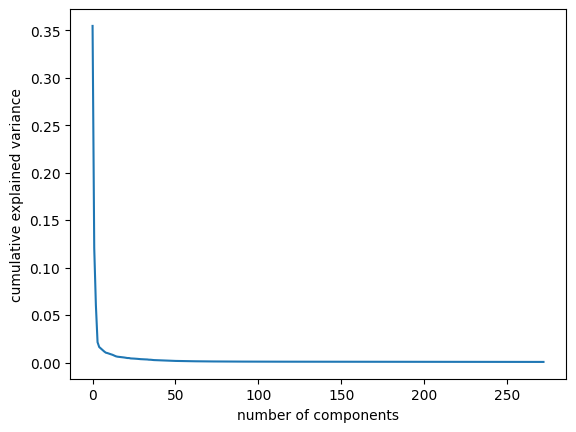

In [48]:
# plot an elbow graph to find the optimal number of components

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA



pca = PCA()

pca.fit(train_features_reduced)  # Fit PCA to your dataset



plt.plot(pca.explained_variance_ratio_)

plt.xlabel('number of components')

plt.ylabel('cumulative explained variance')

pca.explained_variance_ratio_.round(3)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

print("Cumulative explained variance: ", cumulative_variance)

print(cumulative_variance)

In [49]:
print("Principal components shape:", pca.components_.shape)

print("Principal components:\n", pca.components_)



# Preserve the target variable

train_copy = train_data.copy()  # Backup original data

test_copy = test_data.copy()



# Separate target variable and features

train_features = train_data.drop(columns=['price_doc'])  # Features for PCA

train_target = train_data['price_doc']                  # Target variable



test_features = test_data.drop(columns=['price_doc'])    # Features for PCA



# Apply PCA transformation

pca = PCA(n_components=0.95)

train_features_pca = pca.fit_transform(train_features)  # Fit and transform train data

print("train transformed")

test_features_pca = pca.transform(test_features)        # Transform test data



print(train_features_pca.shape)

print(test_features_pca.shape)

Principal components shape: (273, 273)
Principal components:
 [[ 0.07067092  0.06255624  0.05795538 ... -0.0013048  -0.02192354
   0.00626479]
 [ 0.01503391  0.0186232   0.00888305 ...  0.21805486 -0.1199798
  -0.01965517]
 [-0.03492169 -0.02839623 -0.03369691 ...  0.09805785  0.04368432
  -0.07355196]
 ...
 [ 0.01769799 -0.01281731 -0.03702912 ...  0.01295306  0.00314133
  -0.00063403]
 [ 0.0250664  -0.02185359  0.0239796  ... -0.01585847 -0.00213079
  -0.00751948]
 [ 0.06591924 -0.02307591  0.01634803 ... -0.00599596 -0.00419316
  -0.00364232]]
train transformed
(181507, 267)
(77789, 267)


In [50]:
# Reconstruct train_data and test_data with PCA-transformed features and target variable

train_data = pd.DataFrame(train_features_pca)

train_data['price_doc'] = train_target.reset_index(drop=True)



test_data = pd.DataFrame(test_features_pca)

test_data['price_doc'] = test_copy['price_doc'].reset_index(drop=True)

In [51]:
print("train shape: ", train_data.shape)

print("test shape: ", test_data.shape)

train shape:  (181507, 268)
test shape:  (77789, 268)


## Data Splitting - festures and targets



the data in train_data set is of x1 - x78 columns (79 variables) and one target variable (Y). we must split that data so that we can perform data preprocessing on the features variables (will be referred to as X).

In [52]:
# so in X, it is ALL the columns EXCEPT the last column known as 'Y' (we can confirm this using the train_data.head() we did earlier) so we must get all columns and DROP only the 'y' column



X = train_data.drop(columns=['price_doc'])



X # lets display X and see what it is now

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,-1.102957,-0.830170,-1.205671,0.603018,0.683040,0.752873,0.069828,-0.576171,-0.076311,0.268685,...,0.001047,0.007192,-0.009072,-0.034419,0.039749,0.025798,-0.018959,0.013474,-0.012058,0.002513
1,-1.213449,-0.704121,-0.515383,0.144235,0.050278,0.310335,0.298051,0.219452,-0.011154,-0.215708,...,0.042235,-0.023780,-0.003765,-0.037508,-0.016068,0.011552,0.019169,0.016897,-0.027764,0.003545
2,-1.480295,-0.808837,-0.504437,-0.727048,-0.460042,-0.073171,0.043554,0.148689,-0.366601,-0.502495,...,-0.058897,-0.029940,-0.011633,0.014612,0.005689,0.018635,-0.005884,-0.006436,0.027017,0.009818
3,1.980825,-2.830914,1.731182,0.882518,-0.558550,0.226280,-0.268761,-0.775397,0.118198,-0.590821,...,0.013396,0.003379,-0.013542,0.011318,-0.029207,0.042276,0.019761,-0.034107,-0.014548,0.017342
4,-0.988652,-1.130559,0.721607,-1.446864,0.053415,-0.759862,0.858606,-0.386101,-0.377549,-0.691534,...,-0.077668,-0.029688,0.024411,0.016042,0.007934,0.024485,0.022745,0.001834,0.037514,-0.011376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181502,-0.233649,4.169748,0.567373,0.194047,-0.715809,0.415565,-0.282681,-0.222991,-0.273641,0.589468,...,0.022461,0.011688,0.002184,0.024548,-0.014988,0.007809,0.010926,-0.007896,0.012289,0.006662
181503,-0.233649,4.169748,0.567373,0.194047,-0.715809,0.415565,-0.282681,-0.222991,-0.273641,0.589468,...,0.022461,0.011688,0.002184,0.024548,-0.014988,0.007809,0.010926,-0.007896,0.012289,0.006662
181504,-0.233649,4.169748,0.567373,0.194047,-0.715809,0.415565,-0.282681,-0.222991,-0.273641,0.589468,...,0.022461,0.011688,0.002184,0.024548,-0.014988,0.007809,0.010926,-0.007896,0.012289,0.006662
181505,-0.233649,4.169748,0.567373,0.194047,-0.715809,0.415565,-0.282681,-0.222991,-0.273641,0.589468,...,0.022461,0.011688,0.002184,0.024548,-0.014988,0.007809,0.010926,-0.007896,0.012289,0.006662


In [53]:
# so as per our X output, we can see that number of columns in train_data is 79 and number of columns in X is 78 meaning we have successfully performed our removal of target variable



# now to get the target variable alone, we can just get it alone,



Y = train_data['price_doc']



Y # lets see what it is



# as per our Y output, we can see it is of one column and 246k rows which means we have successfully extracted the target variable column

0          5850000.0
1          6000000.0
2          5700000.0
3         16331452.0
4          9100000.0
             ...    
181502     3480000.0
181503     3480000.0
181504     3480000.0
181505     3480000.0
181506     3480000.0
Name: price_doc, Length: 181507, dtype: float64

# Filters



there are two types of filters to filter out columns/features:



- variance filter (a column which has same values throughout the column like all are sunny)



- correlation filter (two columns which are same like weight in kg and weight in pounds)

In [54]:
# print("X : ", X.shape)



# print("test data : ", test_data_processed.shape)

In [55]:
# variance filter



# ----------------------------- case  -----------------------------



# variance_filter = VarianceThreshold(threshold=0.001)  # Adjust the threshold if needed



# X = variance_filter.fit_transform(X)



# test_data_processed = variance_filter.fit_transform(test_data_processed)



X.shape

(181507, 267)

In [56]:
# test_data_processed.shape

In [57]:
# # correlation filter



# # ----------------------------- case  -----------------------------



# corr_matrix = pd.DataFrame(X).corr().abs()



# upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))



# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]



# X = pd.DataFrame(X).drop(columns=to_drop)



# test_data_processed = pd.DataFrame(test_data_processed).drop(columns=to_drop)



X.shape

(181507, 267)

In [58]:
# test_data_processed.shape

## Data Splitting - train and validate



now our test_data set is of rows with NO target variable whereas the train_data set is WITH target variable.



our rules in machine learning is that we must train half or 70% of the data and then we must check its accuracy using the remaining half or 30% of the data - we can only check accuracy IF we have the answers i.e. the target variable. 



So, what we need to do is, is split the train_data set into 2, by a 70% and 30% ratio. we train the model using the 70% and then test the model using the 30% and then use that model to predict the test_data set.

In [59]:
# holdout method



trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=2)

# functions



here we have defined functions like forward-backward selection, kbest selection & algorithm feature importance

In [60]:
# forward backward selection



def fbselection(direction, sample_model, features, X, trainX, trainY, testX, test_data_processed):



    print("starting")



    selection = SequentialFeatureSelector(sample_model, direction=direction, n_features_to_select=features, scoring='roc_auc')



    return modelSelector(sample_model, selection, X, trainX, trainY, testX, test_data_processed)







def modelSelector(sample_model, selection, X, trainX, trainY, testX, test_data_processed):



    print("start extracting")



    trainX = selection.fit_transform(trainX, trainY)



    print("extracted, transforming")



    testX = selection.transform(testX)                                  # Ensure the test set is transformed similarly



    test_data_processed = selection.transform(test_data_processed)      # test data is also transformed



    X = selection.transform(X)                                          # full data transforming



    print("transformed")



    return sample_model, X, trainX, trainY, testX, test_data_processed







# kbest selection



def kbest(sample_model, features, X, trainX, trainY, testX, test_data_processed):



    print("starting")



    selection = SelectKBest(score_func=f_regression, k=features)



    return modelSelector(sample_model, selection, X, trainX, trainY, testX, test_data_processed)

In [61]:
# feature importance function



def featureImportance(sample_model, features, X, trainX, trainY, testX, test_data_processed):



    print("fitting")



    



    # fit the model



    sample_model.fit(trainX, trainY)







    print("extracting features")







    # extract all the feature names from data



    importances = sample_model.feature_importances_



    feature_names = train_data.drop(columns=['Y']).columns



    print(feature_names)







    # sort with respect to importance



    feature_importance_df = pd.DataFrame({



        'Feature': feature_names,



        'Importance': importances



    }).sort_values(by='Importance', ascending=False)







    # extract the top ones



    top_features = feature_importance_df['Feature'].head(features).values



    print(top_features)







    # change all data according to the top ones we have selected



    trainX = pd.DataFrame(trainX, columns=feature_names)[top_features]



    testX = pd.DataFrame(testX, columns=feature_names)[top_features]



    X = pd.DataFrame(X, columns=feature_names)[top_features]



    test_data_processed = pd.DataFrame(test_data_processed, columns=feature_names)[top_features]







    print("features extracted")



    



    # retrain the model



    sample_model.fit(trainX, trainY)







    print("features trained")



    



    return sample_model, X, trainX, trainY, testX, test_data_processed

## model intialization



here model is intialized

In [62]:
model = KNeighborsRegressor(

    n_neighbors=67,             # Number of neighbors to consider

    weights='distance',         # Weighting function ('uniform' or 'distance')

    # algorithm='auto',          # Algorithm used to find neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')

    leaf_size=30,              # Leaf size for BallTree or KDTree

    p=2,                       # Power parameter for Minkowski metric (1 for Manhattan, 2 for Euclidean)

    metric='euclidean',        # Distance metric to use

    n_jobs=-1                  # Number of parallel jobs (-1 for using all processors)

)

In [63]:
print("X shape -> ", X.shape)



print("trainX shape -> ", trainX.shape)



print("testX shape -> ", testX.shape)



print("test_data_processed shape -> ", test_data.shape)

X shape ->  (181507, 267)
trainX shape ->  (127054, 267)
testX shape ->  (54453, 267)
test_data_processed shape ->  (77789, 268)


# feature selection



here we will apply feature selection and feature importance

In [64]:
# from scipy.sparse import isspmatrix_csr



# for name, data in [("X", X), ("trainX", trainX), ("trainY", trainY), ("testX", testX), ("test_data", test_data)]:



#     assert not isspmatrix_csr(data), f"{name} is now a csr_matrix!"

In [65]:
model

KNeighborsRegressor(metric='euclidean', n_jobs=-1, n_neighbors=67,
                    weights='distance')

In [66]:
# apply feature selection here



# model, X, trainX, trainY, testX, test_data = kbest(model, 200, X, trainX, trainY, testX, test_data)

In [67]:
model

KNeighborsRegressor(metric='euclidean', n_jobs=-1, n_neighbors=67,
                    weights='distance')

# grid search

In [68]:
def gridsearch(param_grid, model, scorer, trainX, trainY):



    print("starting grid search")







    # intialize grid search



    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=scorer, verbose=3)



    print("grid search is intialized")







    # fit the model



    grid_search.fit(trainX, trainY)



    print("grid search fitting completed")







    # display the best model grid search found



    best_model = grid_search.best_estimator_



    print(best_model)







    # display the best parameters of the best model



    best_parameters = grid_search.best_params_



    print(best_parameters)







    # display the best score of the best model



    print("Best cross-validated score:", grid_search.best_score_)







    # assign the best model our model



    model = best_model



    print("model assigned, grid search completed")







    return model

In [69]:
# Define a scoring metric (e.g., negative mean squared error)



# scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [70]:
# define hyper parameters of grid



# param_grid = {

#     'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']

# }

In [71]:
# model = gridsearch(param_grid, model, scorer, trainX, trainY)

# sampling data



we do this when dataset is too big and model is too slow. this model took 10hours to just train on train data and then after 1 hour of predicting on testX, it failed. kernel crashed. hence this doesnt work on full data.     



However, we can achieve this model by taking 10% sample, train a model, predict, find its MSE. then repeat n times and pick the model with the smallest MSE. 

In [72]:
print("X shape -> ", X.shape)



print("trainX shape -> ", trainX.shape)



print("testX shape -> ", testX.shape)



print("test_data_processed shape -> ", test_data.shape)

X shape ->  (181507, 267)
trainX shape ->  (127054, 267)
testX shape ->  (54453, 267)
test_data_processed shape ->  (77789, 268)


In [73]:
model

KNeighborsRegressor(metric='euclidean', n_jobs=-1, n_neighbors=67,
                    weights='distance')

In [74]:
# trainX = preprocessor.fit_transform(trainX)



# print(trainX.shape)



# testX = preprocessor.transform(testX)



# print(testX.shape)



# test_data = preprocessor.transform(test_data)



# print(test_data.shape)



# X = preprocessor.transform(X)



# print(X.shape)

## model running



here we run the model

In [75]:
# fit the model



model.fit(trainX, trainY)

KNeighborsRegressor(metric='euclidean', n_jobs=-1, n_neighbors=67,
                    weights='distance')

In [76]:
# display information regarding the regression



print("model score: ", model.score(trainX, trainY))



# print("model coefficient: ", model.coef_)



# print("model intercept: ", model.intercept_)   

model score:  0.9999985670685032


In [77]:
# predict using this model USING PREDICT



y_pred = model.predict(testX)



print("successfully predicted")



metrics(y_pred, testY)

successfully predicted
starting to compute metrics
Mean squared error: 167815929949379.91    
Root Mean squared error: 12954378.79    
Mean absolute error: 5813474.85    
Coefficient of determination: 0.65     


In [78]:
# # predict using thus model USING PREDICTPROBA



# y_pred_proba = model.predict_proba(testX)[:, 1]



# print("successfully predicted")



# metrics(y_pred_proba, testY)

## predict for test dataset



fit the model and predict for test dataset

In [79]:
model.fit(X, Y)

KNeighborsRegressor(metric='euclidean', n_jobs=-1, n_neighbors=67,
                    weights='distance')

In [80]:
# display information regarding the regression



print("model score: ", model.score(X, Y), "    ")



# print("model coefficient: ", model.coef_)



# print("model intercept: ", model.intercept_)

model score:  0.9999973414753984     


In [82]:
test_prediction = model.predict(test_data.drop(columns=['price_doc']))







# test_prediction=test_prediction[:, 1]







print(test_prediction)

[10711637.17736433  6059099.56704214  5570780.55480924 ...
  3480000.          3480000.          3480000.        ]


## write into csv



now we write the predictions into the csv file

In [83]:
sample_data = pd.read_csv(r"/kaggle/input/challenge2/sample_submission.csv")







sample_data['price_doc'] = test_prediction



sample_data







sample_data.to_csv(r"/kaggle/working/knn1.csv", index=False)



sample_data

,row ID,price_doc
0,Row3,1.071164e+07
1,Row6,6.059100e+06
2,Row11,5.570781e+06
3,Row12,7.167149e+06
4,Row14,5.397304e+06
...,...,...
77784,Row18591dupl_228801,5.622014e+07
77785,Row18591dupl_228803,5.257353e+07
77786,Row18591dupl_228814,3.480000e+06
77787,Row18591dupl_228817,3.480000e+06


In [84]:
model

KNeighborsRegressor(metric='euclidean', n_jobs=-1, n_neighbors=67,
                    weights='distance')